In [1]:
from NN_train_parameters import *
from Train import train_model
from ODE_parameters import *
from Utilities import get_domain, nth_derivative, plot_function, make_report,  LossMSE, plot_results
from math import pi

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x) \\ u(0)=0, u(1)=1$$

In [7]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1
number_of_points = 20

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + 0.2 * nth_derivative(function, variable, 1)
    + function
    + 0.2 * torch.exp(-variable / 5) * torch.cos(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: x
    * torch.sin(torch.tensor([1.0]))
    * torch.exp(torch.tensor([-0.2]))
    + x * (1 - x) * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(-x / 5) * torch.sin(x)

In [9]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 128.55it/s]

train Loss: 0.0154



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.84it/s]

val Loss: 0.2731
Epoch 1/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.38it/s]

train Loss: 0.0801



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 271.00it/s]

val Loss: 0.3400
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 140.24it/s]

train Loss: 0.1556



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 318.31it/s]

val Loss: 0.5333
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.27it/s]

train Loss: 0.1882



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.75it/s]

val Loss: 0.1585
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 137.35it/s]

train Loss: 0.0845



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 299.31it/s]

val Loss: 0.3977
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 133.69it/s]

train Loss: 0.1376



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 274.71it/s]

val Loss: 0.0896
Epoch 6/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 147.45it/s]

train Loss: 0.0616



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 299.31it/s]

val Loss: 0.0503
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.30it/s]

train Loss: 0.0263



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 282.44it/s]

val Loss: 0.0099
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.22it/s]

train Loss: 0.0128



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.76it/s]

val Loss: 0.0085
Epoch 9/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.13it/s]

train Loss: 0.0059



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 339.89it/s]

val Loss: 0.0022
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 142.22it/s]

train Loss: 0.0013



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 323.45it/s]

val Loss: 0.0001
Epoch 11/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 137.35it/s]

train Loss: 0.0007



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 334.23it/s]

val Loss: 0.0004
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 147.45it/s]

train Loss: 0.0003



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.75it/s]

val Loss: 0.0001
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.56it/s]

train Loss: 0.0001



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 323.45it/s]

val Loss: 0.0000
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.26it/s]

train Loss: 0.0001



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.36it/s]

val Loss: 0.0000
Epoch 15/49:



 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [00:00<00:00, 143, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10008 characters

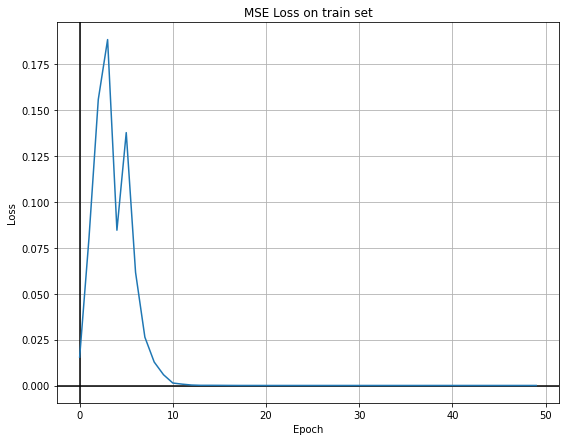

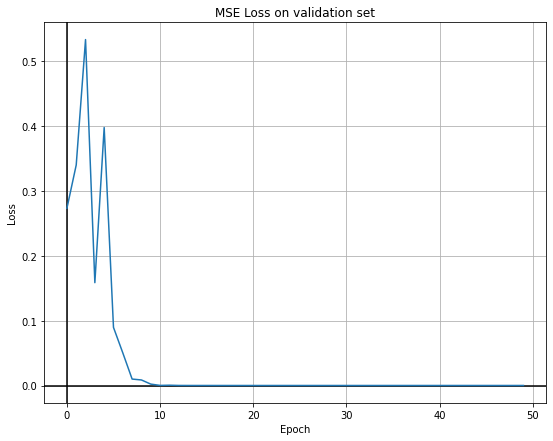

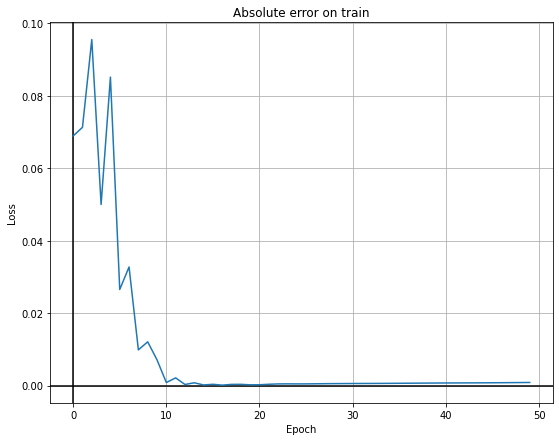

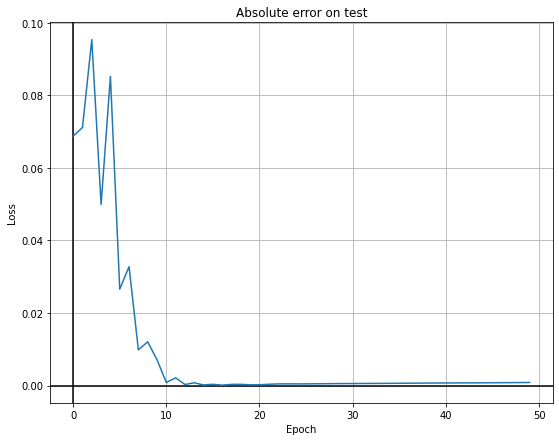

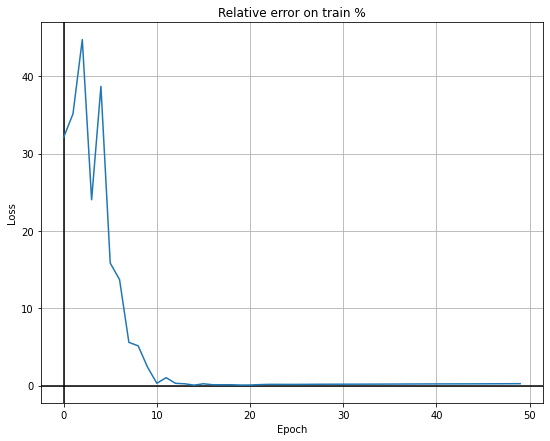

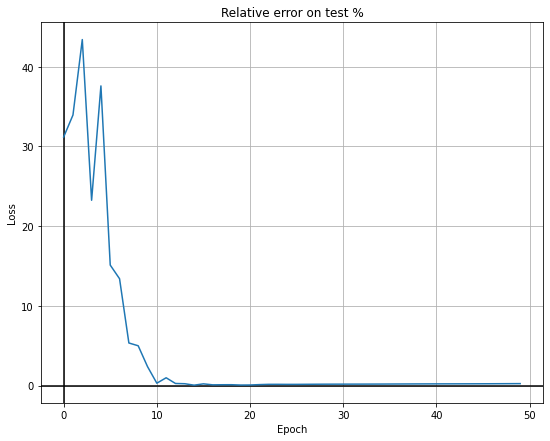

In [10]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.0008366405963897705
Train relative error: 0.23727072775363922 %
Valid absolute error: 0.0008367300033569336
Valid relative error: 0.23718836903572083 %


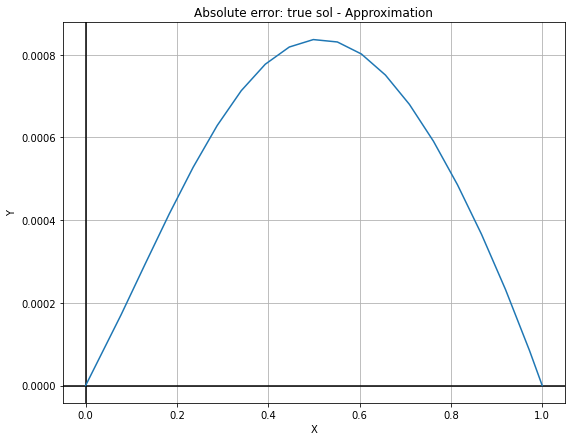

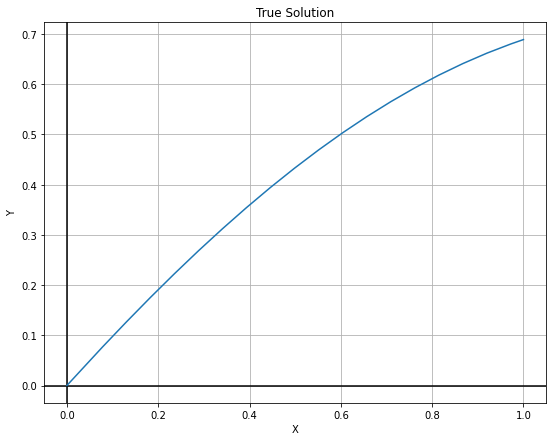

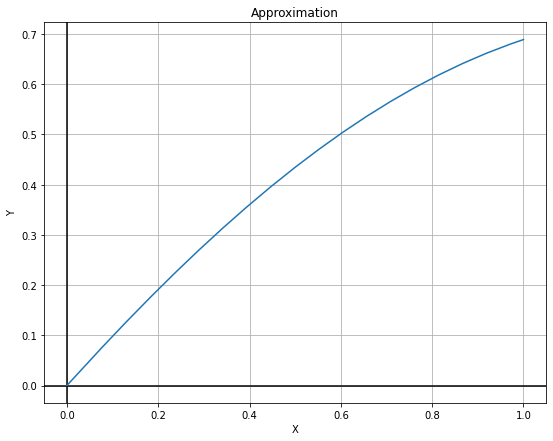

In [11]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x) \\ u(0)=0, u'(0)=1 \\ x \in [0,2]$$

In [42]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 2
number_of_points = 20

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + 0.2 * nth_derivative(function, variable, 1)
    + function
    + 0.2 * torch.exp(-variable / 5) * torch.cos(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: x
    + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(-x / 5) * torch.sin(x)

In [43]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 142.21it/s]

train Loss: 0.0197



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.60it/s]

val Loss: 0.2533
Epoch 1/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 149.65it/s]

train Loss: 0.2246



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.75it/s]

val Loss: 0.0067
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 138.30it/s]

train Loss: 0.0426



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 339.89it/s]

val Loss: 0.0369
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 153.08it/s]

train Loss: 0.0346



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 318.32it/s]

val Loss: 0.0315
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 133.69it/s]

train Loss: 0.0115



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 313.33it/s]

val Loss: 0.0357
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 133.69it/s]

train Loss: 0.0379



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 303.83it/s]

val Loss: 0.0433
Epoch 6/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 123.03it/s]

train Loss: 0.0535



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 385.64it/s]

val Loss: 0.0428
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.24it/s]

train Loss: 0.0429



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 318.23it/s]

val Loss: 0.0206
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 135.50it/s]

train Loss: 0.0213



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.82it/s]

val Loss: 0.0254
Epoch 9/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.27it/s]

train Loss: 0.0199



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 278.53it/s]

val Loss: 0.0320
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 123.79it/s]

train Loss: 0.0473



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 328.75it/s]

val Loss: 0.0145
Epoch 11/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 135.50it/s]

train Loss: 0.0338



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.45it/s]

val Loss: 0.0413
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.27it/s]

train Loss: 0.0316



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 358.16it/s]

val Loss: 0.0238
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 137.82it/s]

train Loss: 0.0334



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.36it/s]

val Loss: 0.0355
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.54it/s]

train Loss: 0.0216



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.36it/s]

val Loss: 0.0535
Epoch 15/49:



 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [00:00<00:00, 157, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10008 characters

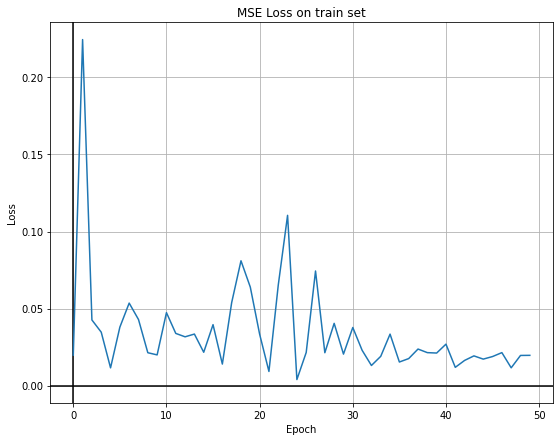

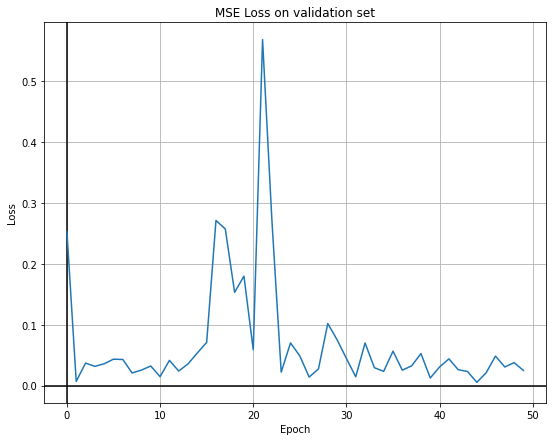

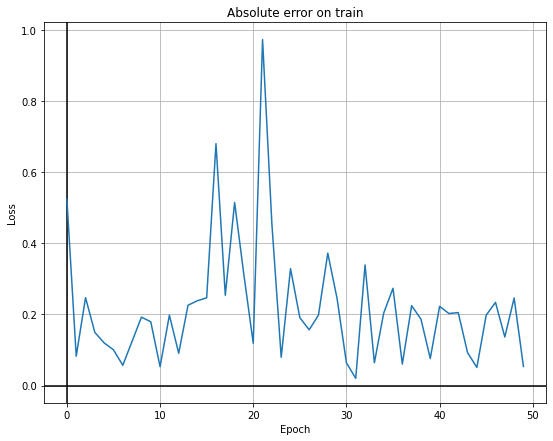

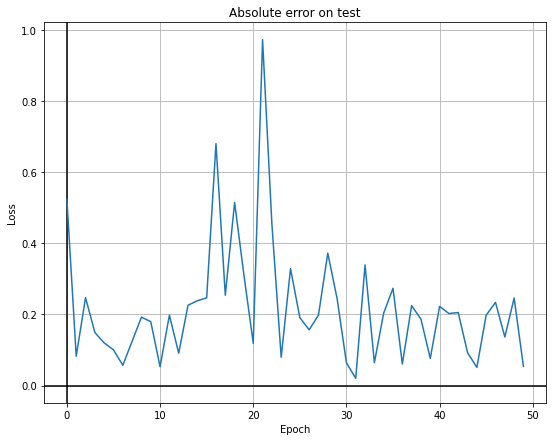

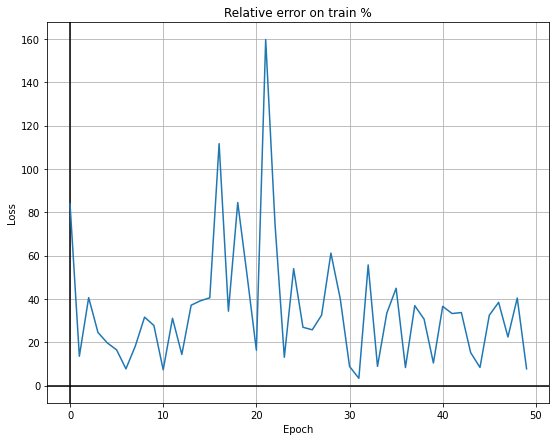

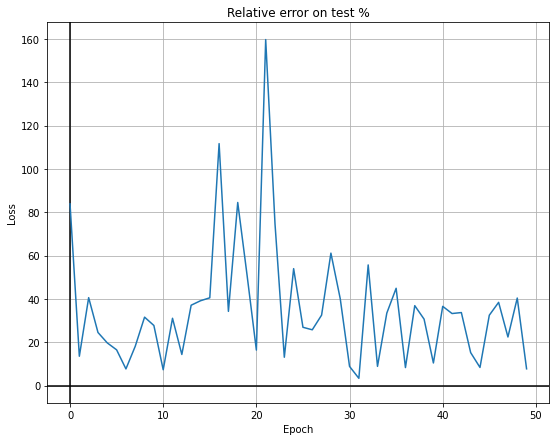

In [44]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.053515613079071045
Train relative error: 7.703930854797363 %
Valid absolute error: 0.053591012954711914
Valid relative error: 7.699945449829102 %


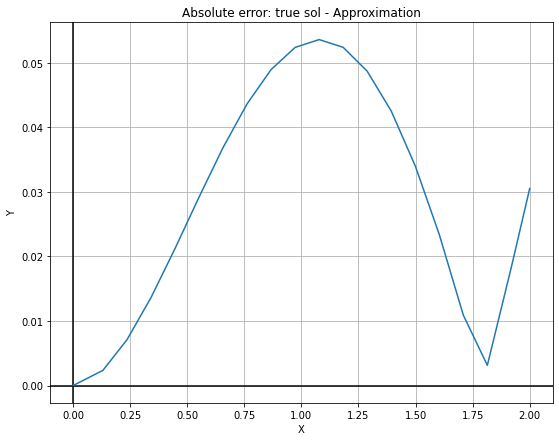

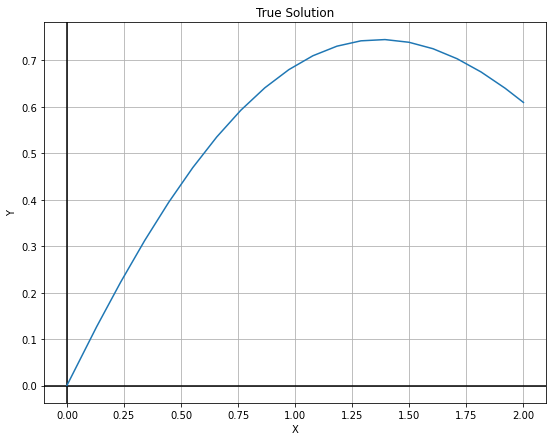

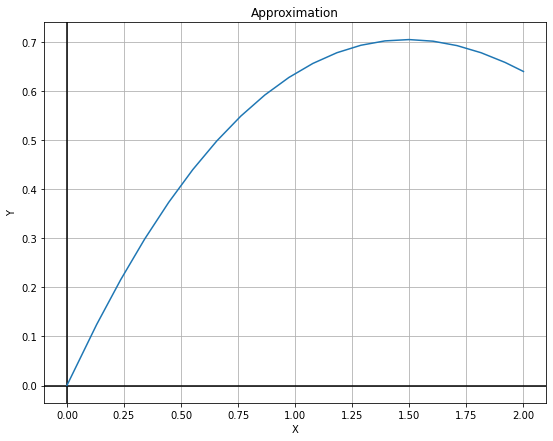

In [45]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ x' + 0.2x = exp(-0.2x)cos(x) \\ x(0) = 0 \\ x \in [0.2] $$

In [46]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 2
number_of_points = 20

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value:  x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(-x / 5) * torch.sin(x)

In [47]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 233.19it/s]

train Loss: 0.1555



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 716.15it/s]

val Loss: 0.0184
Epoch 1/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 260.44it/s]

train Loss: 0.0072



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 771.33it/s]

val Loss: 0.0182
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 267.38it/s]

train Loss: 0.0171



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 716.21it/s]

val Loss: 0.0278
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 263.79it/s]

train Loss: 0.0258



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 668.49it/s]

val Loss: 0.0655
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 257.10it/s]

train Loss: 0.0386



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 742.76it/s]

val Loss: 0.0287
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 260.44it/s]

train Loss: 0.0252



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 626.70it/s]

val Loss: 0.2470
Epoch 6/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 235.86it/s]

train Loss: 0.0731



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 668.46it/s]

val Loss: 0.0855
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 233.18it/s]

train Loss: 0.0549



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 668.46it/s]

val Loss: 0.1504
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 263.86it/s]

train Loss: 0.0278



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 716.13it/s]

val Loss: 0.1421
Epoch 9/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 227.88it/s]

train Loss: 0.0773



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 716.23it/s]

val Loss: 0.0943
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 230.47it/s]

train Loss: 0.0175



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 716.16it/s]

val Loss: 0.3120
Epoch 11/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 250.67it/s]

train Loss: 0.1351



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 871.92it/s]

val Loss: 0.0390
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 233.18it/s]

train Loss: 0.0167



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 835.59it/s]

val Loss: 0.3042
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 235.92it/s]

train Loss: 0.1212



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 742.74it/s]

val Loss: 0.0343
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 286.48it/s]

train Loss: 0.0159



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 771.30it/s]

val Loss: 0.1535
Epoch 15/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 278.53it/s]

train Loss: 0.0725



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 742.73it/s]

val Loss: 0.0125
Epoch 16/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 260.44it/s]

train Loss: 0.0082



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 742.71it/s]

val Loss: 0.0183
Epoch 17/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 274.71it/s]

train Loss: 0.0116



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 802.17it/s]

val Loss: 0.0282
Epoch 18/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 282.45it/s]

train Loss: 0.0187



100%|█████████████████████████████████████████████████████                                      | 0/20 [00:00<?, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10061 characters

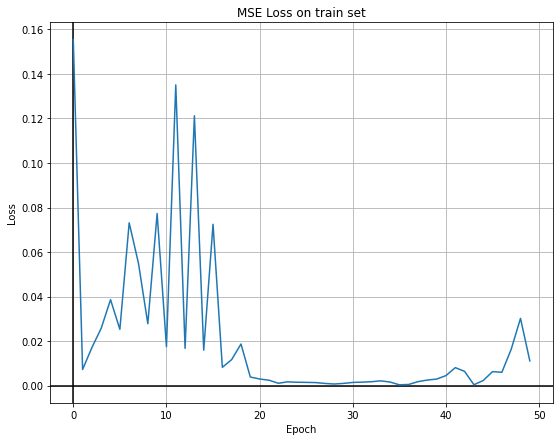

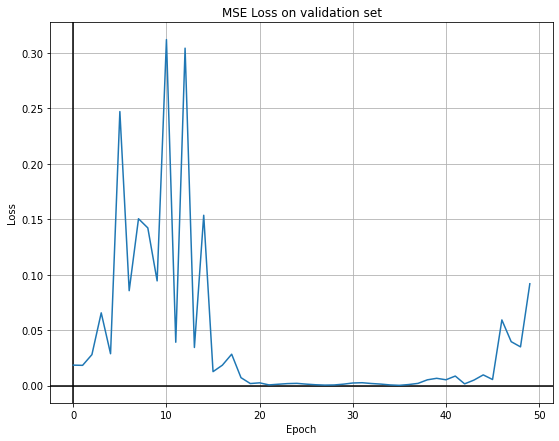

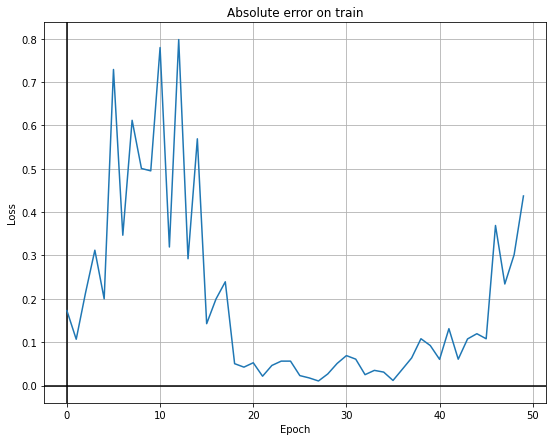

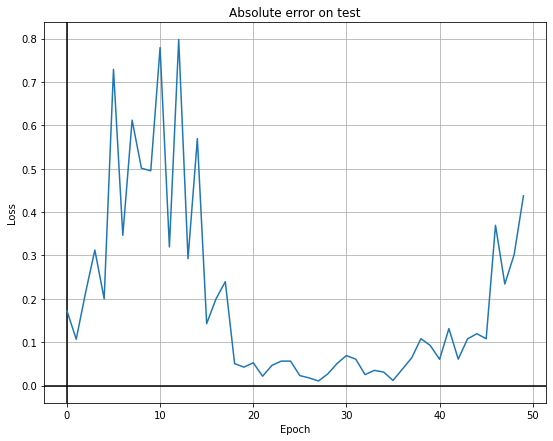

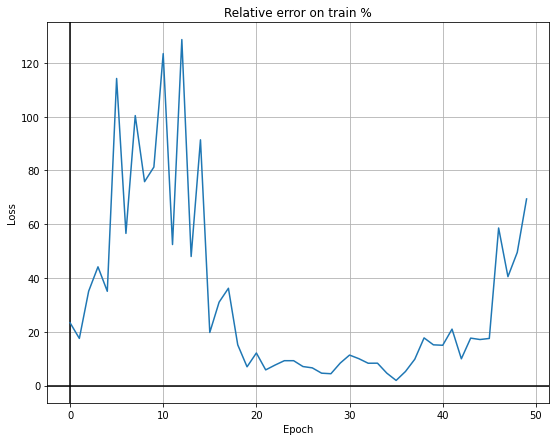

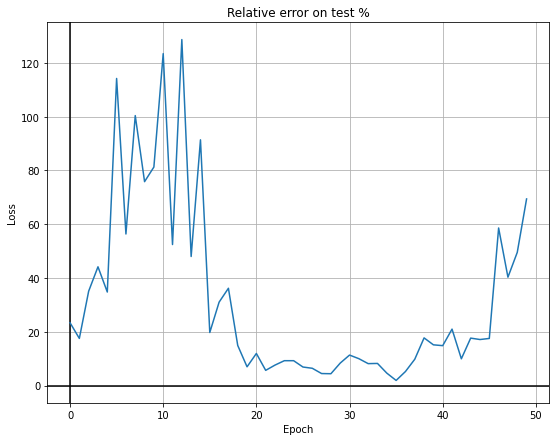

In [48]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.4372767508029938
Train relative error: 69.37751007080078 %
Valid absolute error: 0.43729227781295776
Valid relative error: 69.37751007080078 %


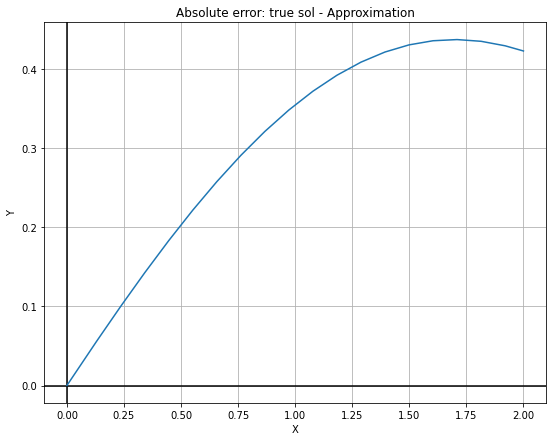

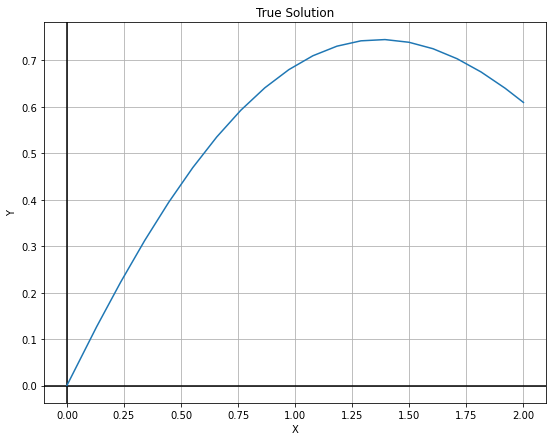

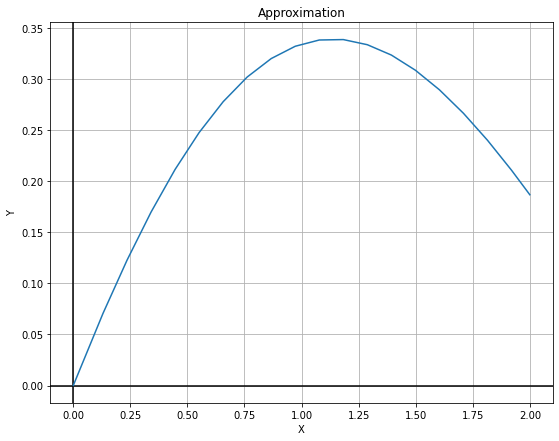

In [49]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$x''+4x=cos(2t) \\ x(0)=1, x'(0)=-1$$

In [12]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1

differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + 4 * function
    - torch.cos(2*variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: 
    1 - x + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)

In [14]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 164.38it/s]

train Loss: 1.9774



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 426.69it/s]

val Loss: 1.5962
Epoch 1/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 183.98it/s]

train Loss: 1.3051



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 409.27it/s]

val Loss: 1.1315
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 169.94it/s]

train Loss: 1.2151



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.38it/s]

val Loss: 0.0335
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 179.05it/s]

train Loss: 0.1932



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 426.68it/s]

val Loss: 0.9215
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.04it/s]

train Loss: 0.2722



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 401.06it/s]

val Loss: 0.2212
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 172.87it/s]

train Loss: 0.4913



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.34it/s]

val Loss: 0.8226
Epoch 6/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 171.40it/s]

train Loss: 0.7420



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 409.26it/s]

val Loss: 0.3533
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 157.89it/s]

train Loss: 0.1837



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 393.21it/s]

val Loss: 0.1641
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 167.12it/s]

train Loss: 0.3938



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.67it/s]

val Loss: 0.7196
Epoch 9/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 140.23it/s]

train Loss: 0.5739



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.38it/s]

val Loss: 0.1174
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 171.40it/s]

train Loss: 0.1430



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 417.81it/s]

val Loss: 0.1271
Epoch 11/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 172.87it/s]

train Loss: 0.3334



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 334.23it/s]

val Loss: 0.6151
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 147.45it/s]

train Loss: 0.4691



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.36it/s]

val Loss: 0.1263
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 182.31it/s]

train Loss: 0.1221



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 466.37it/s]

val Loss: 0.1528
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 175.91it/s]

train Loss: 0.3039



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 435.95it/s]

val Loss: 0.3962
Epoch 15/49:



 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:00<00:00, 183, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10008 characters

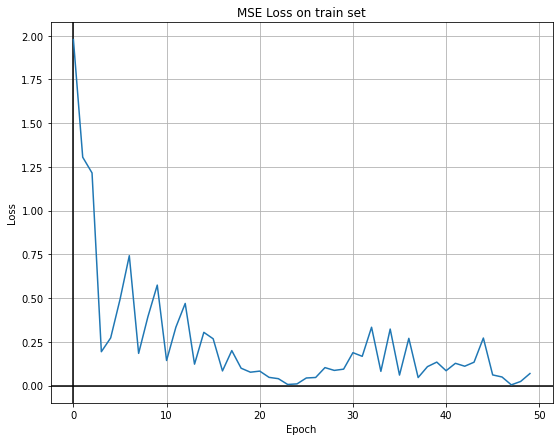

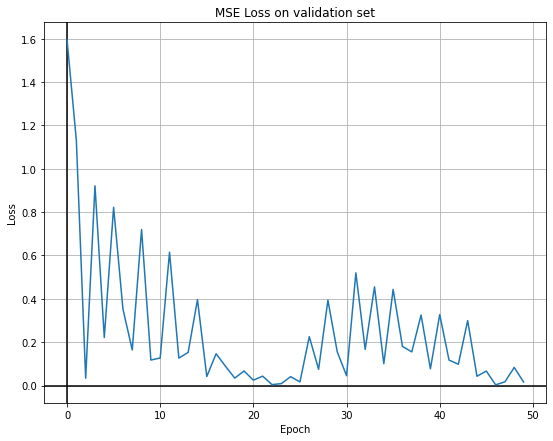

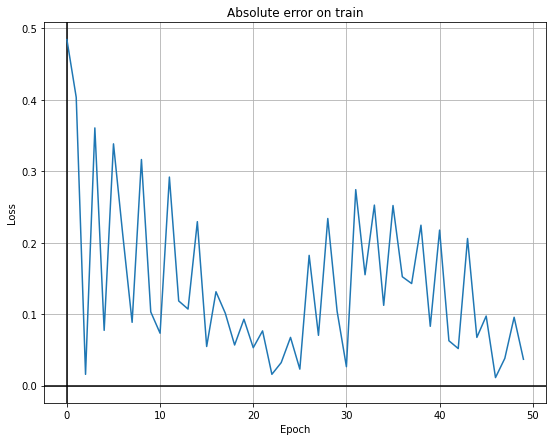

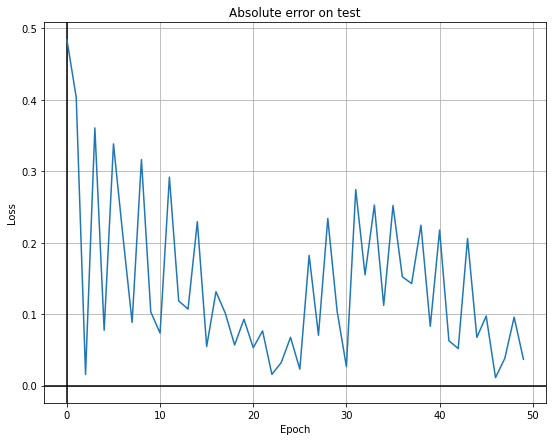

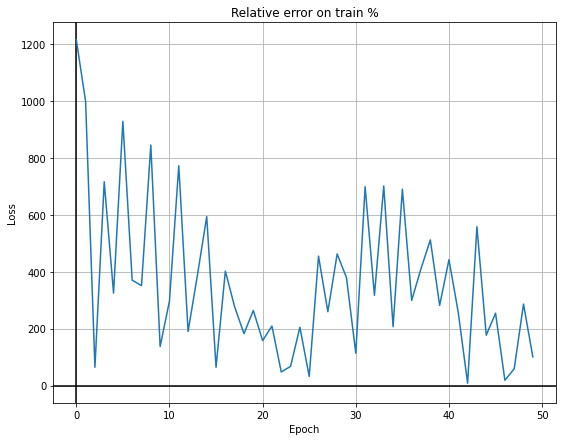

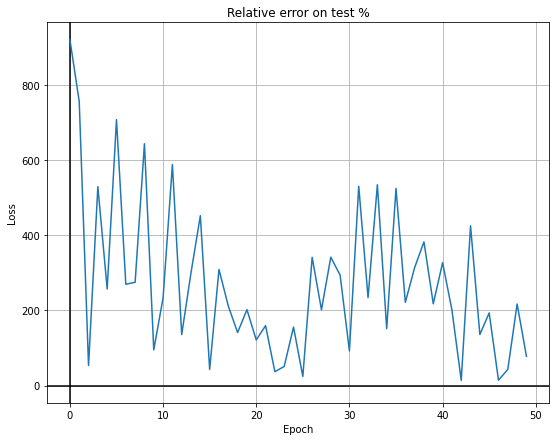

In [15]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.03673076629638672
Train relative error: 100.58963012695312 %
Valid absolute error: 0.03673076629638672
Valid relative error: 77.7767333984375 %


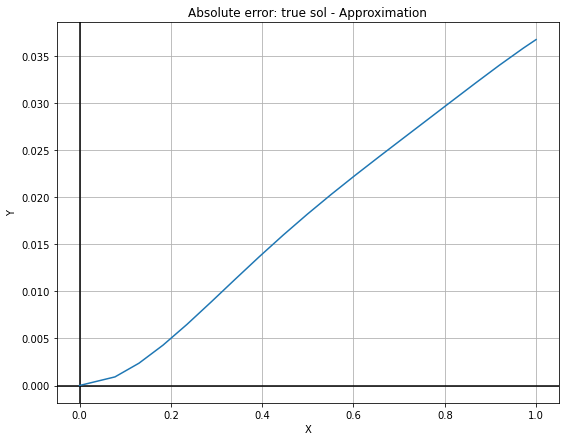

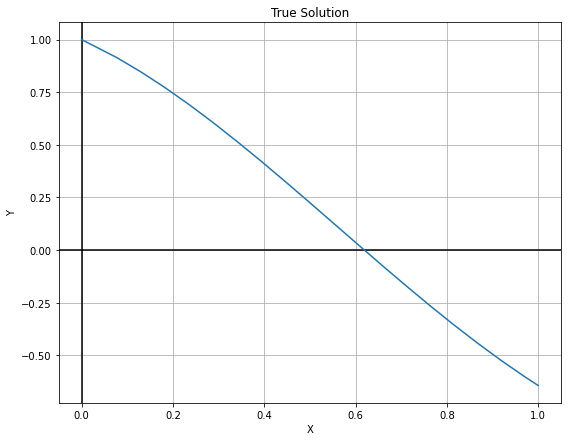

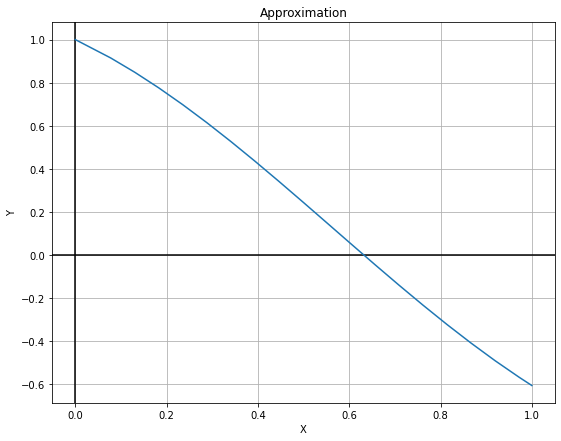

In [16]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$x''' - 3x'' + 3x' -x = exp(t) \\ x(0)=1, x'(0)=-1, x''(0)=1$$

In [25]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 3)
    - 3 * nth_derivative(function, variable, 2)
    + 3 * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: 
    1 - x + x * x / 2 + x * x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(x) * (1/6*x*x*x + 1 - 2* x + 2 * x*x)

In [26]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 62.67it/s]

train Loss: 75.3066



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 142.22it/s]

val Loss: 36.2389
Epoch 1/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.26it/s]

train Loss: 29.2254



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.24it/s]

val Loss: 28.7655
Epoch 2/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.68it/s]

train Loss: 38.8165



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 139.26it/s]

val Loss: 23.7605
Epoch 3/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.18it/s]

train Loss: 29.6869



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 153.08it/s]

val Loss: 20.9504
Epoch 4/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 69.63it/s]

train Loss: 28.7821



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.55it/s]

val Loss: 17.5554
Epoch 5/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.68it/s]

train Loss: 23.3335



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.38it/s]

val Loss: 13.8308
Epoch 6/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.29it/s]

train Loss: 19.8889



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.22it/s]

val Loss: 10.8209
Epoch 7/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.62it/s]

train Loss: 14.5054



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 136.42it/s]

val Loss: 4.1803
Epoch 8/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 65.75it/s]

train Loss: 7.4354



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 132.81it/s]

val Loss: 3.1755
Epoch 9/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.49it/s]

train Loss: 6.3844



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.59it/s]

val Loss: 8.1240
Epoch 10/49:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 65.75it/s]

train Loss: 5.7169



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.98it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10028 characters

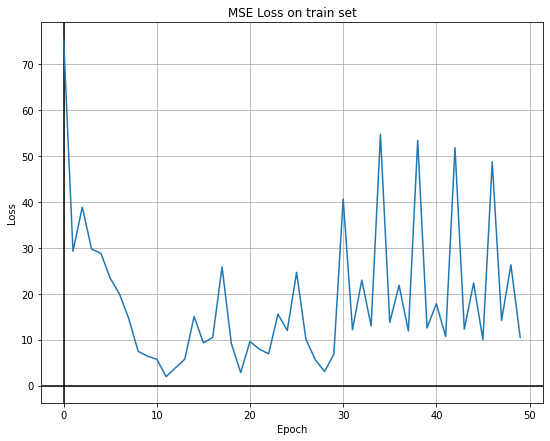

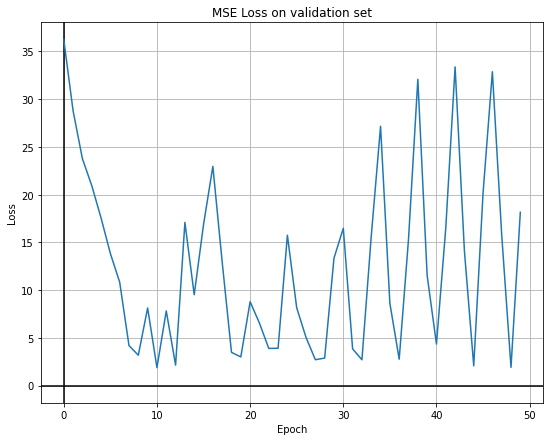

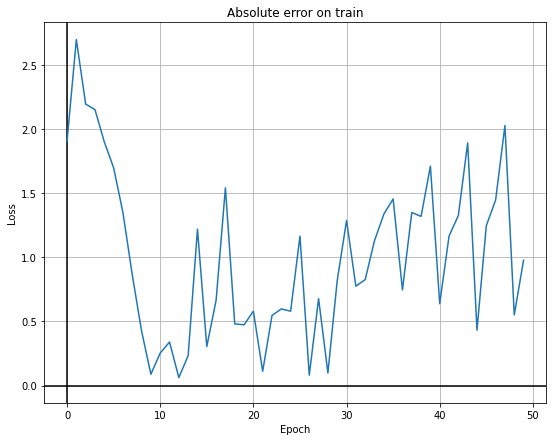

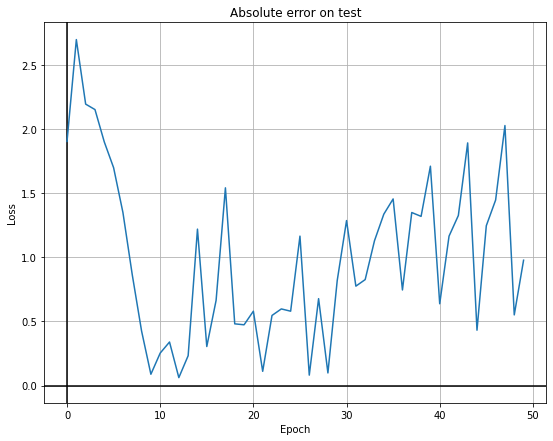

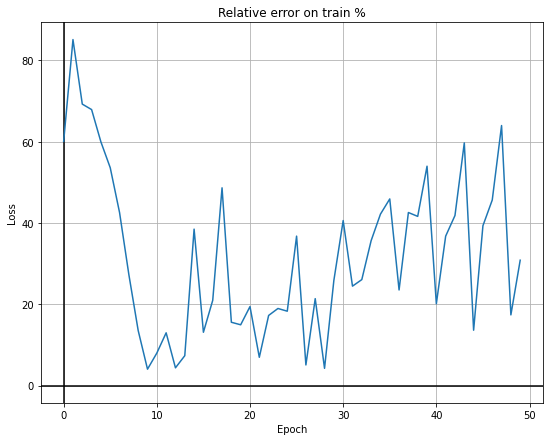

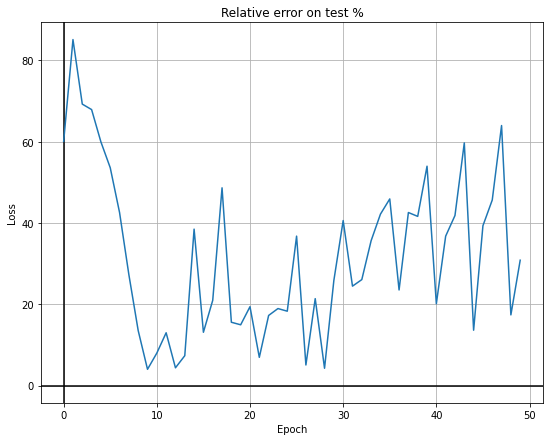

In [27]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.9779386520385742
Train relative error: 30.836877822875977 %
Valid absolute error: 0.9779386520385742
Valid relative error: 30.836877822875977 %


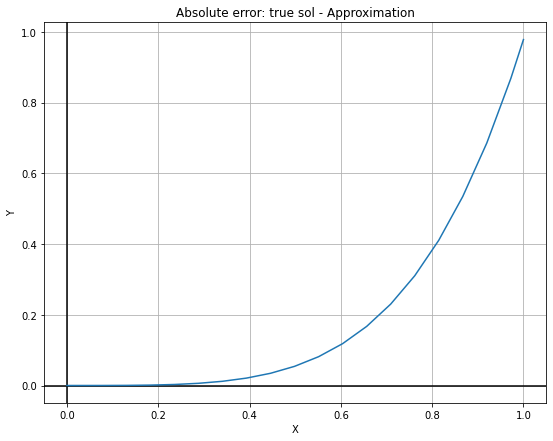

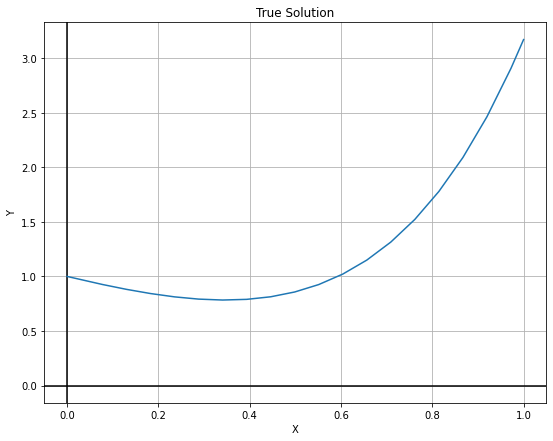

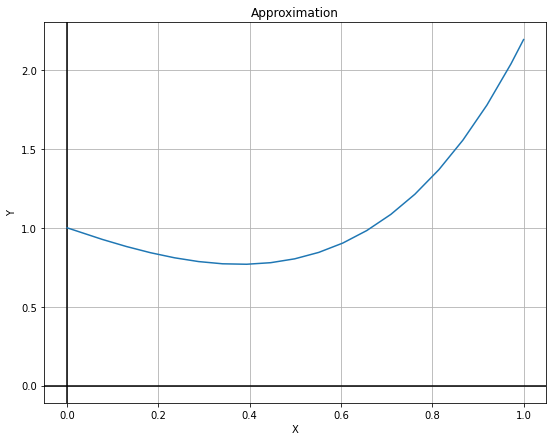

In [28]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$u'' + u = -x, \\ u(0) = u(1) = 0$$

In [29]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + function
    + variable
)


approximation_of_function = (
    lambda x, nn_model_value: 
    x * (1-x) * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.sin(x)/torch.sin(torch.Tensor([1])) - x

In [30]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 156.67it/s]

train Loss: 0.0255



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 445.64it/s]

val Loss: 0.5214
Epoch 1/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 168.52it/s]

train Loss: 0.1920



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 385.65it/s]

val Loss: 0.3416
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 183.98it/s]

train Loss: 0.1305



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 426.66it/s]

val Loss: 1.1360
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 179.05it/s]


train Loss: 0.3794


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 445.61it/s]

val Loss: 0.2074
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 164.37it/s]

train Loss: 0.1463



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.38it/s]

val Loss: 0.5505
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 177.46it/s]

train Loss: 0.2260



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 417.81it/s]

val Loss: 0.1090
Epoch 6/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 177.46it/s]


train Loss: 0.0754


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 426.67it/s]

val Loss: 0.0256
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.04it/s]

train Loss: 0.0389



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 409.28it/s]

val Loss: 0.0133
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 179.05it/s]

train Loss: 0.0060



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 401.08it/s]

val Loss: 0.0022
Epoch 9/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 169.95it/s]

train Loss: 0.0031



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 385.66it/s]

val Loss: 0.0007
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 169.94it/s]

train Loss: 0.0015



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 393.20it/s]

val Loss: 0.0006


Epoch 11/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 177.47it/s]

train Loss: 0.0007



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 466.02it/s]

val Loss: 0.0004
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 174.38it/s]


train Loss: 0.0008


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 455.74it/s]

val Loss: 0.0003
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 180.63it/s]

train Loss: 0.0006



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.37it/s]

val Loss: 0.0002
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.24it/s]

train Loss: 0.0004



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.82it/s]

val Loss: 0.0001
Epoch 15/49:



 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [00:00<00:00, 170, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10008 characters

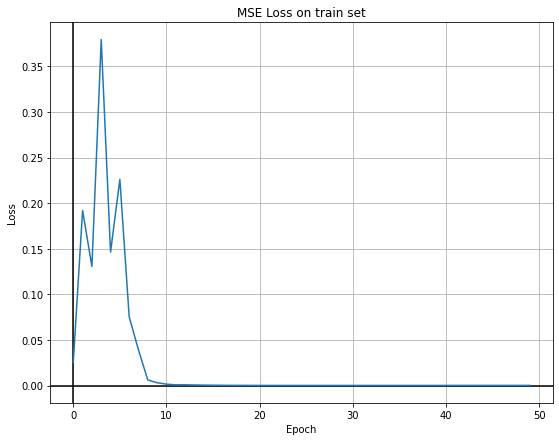

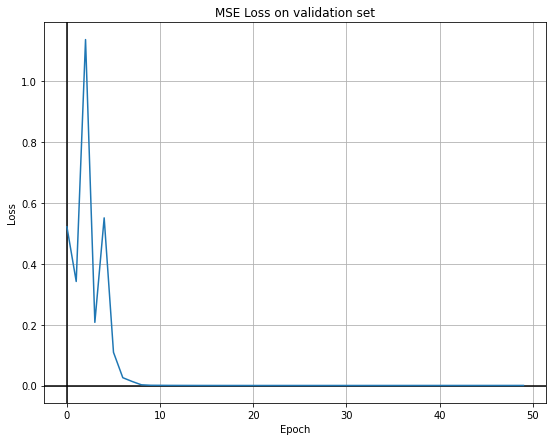

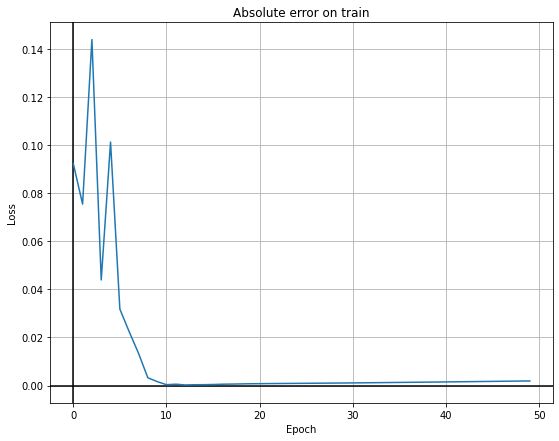

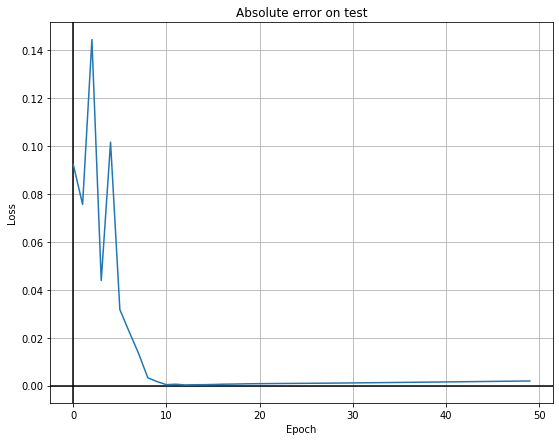

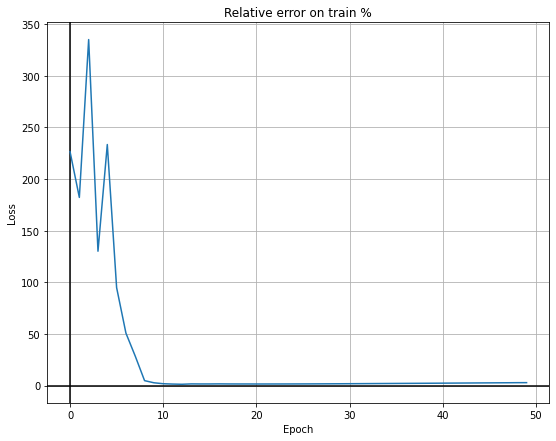

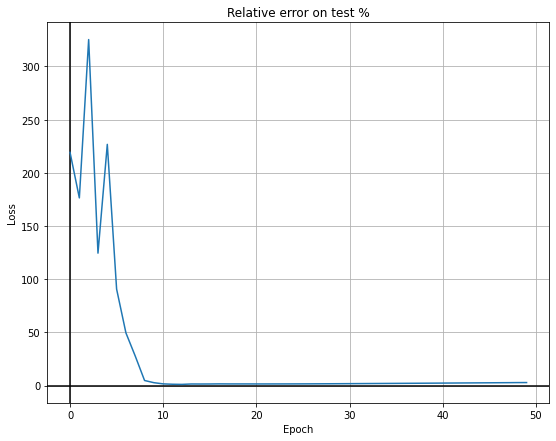

In [31]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.001886904239654541
Train relative error: 2.7678117752075195 %
Valid absolute error: 0.0018823891878128052
Valid relative error: 2.770048141479492 %


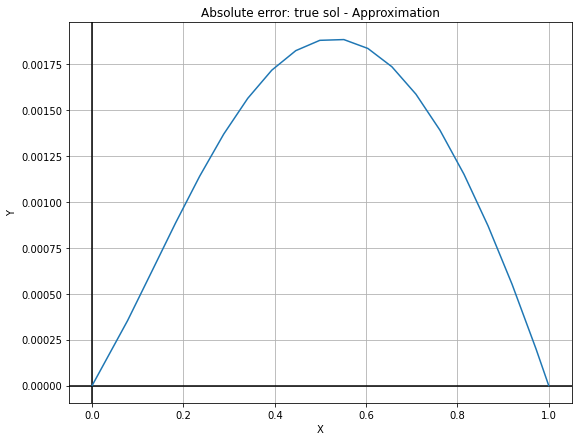

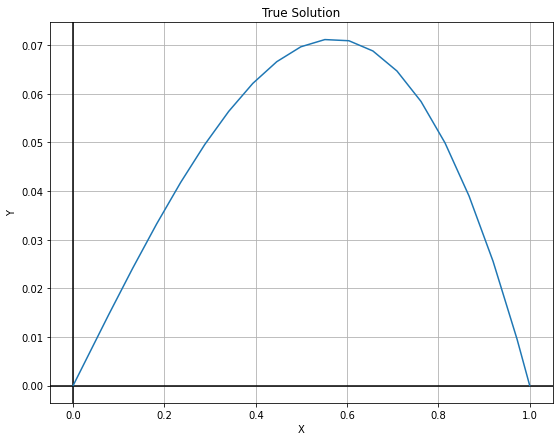

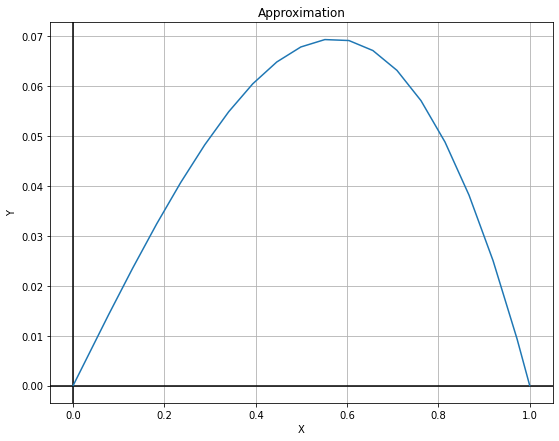

In [32]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$x'' + x' = 1 \\ x'(0) = 0 \\ x(\frac{\pi}{2})-x'(\frac{\pi}{2})= 2$$

In [36]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + function
    - 1
)


approximation_of_function = (
    lambda x, nn_model_value: 
    x * x * (1-x) * (1-x) * nn_model_value + 2
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.Tensor([1]) + torch.cos(x)

In [37]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 138.30it/s]

train Loss: 1.5541



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 385.65it/s]

val Loss: 0.9989
Epoch 1/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.16it/s]

train Loss: 1.1106



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 378.37it/s]

val Loss: 0.9953
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 165.73it/s]

train Loss: 1.0600



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.65it/s]

val Loss: 0.9905
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.38it/s]

train Loss: 1.0494



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 334.23it/s]

val Loss: 0.9897
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 160.43it/s]

train Loss: 1.0514



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.81it/s]

val Loss: 0.9913
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.26it/s]

train Loss: 1.0645



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 409.26it/s]


val Loss: 0.9964
Epoch 6/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.04it/s]

train Loss: 1.0890



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 334.17it/s]

val Loss: 1.0053
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 157.90it/s]

train Loss: 1.1127



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.37it/s]

val Loss: 1.0110
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 157.90it/s]

train Loss: 1.1128



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.60it/s]

val Loss: 1.0050
Epoch 9/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.16it/s]

train Loss: 1.1000



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 328.74it/s]

val Loss: 0.9988
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.27it/s]

train Loss: 1.0816



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.37it/s]

val Loss: 0.9922
Epoch 11/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 161.73it/s]

train Loss: 1.0590



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.37it/s]

val Loss: 0.9861
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 156.67it/s]

train Loss: 1.0374



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.61it/s]

val Loss: 0.9826
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 167.11it/s]

train Loss: 1.0244



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 417.78it/s]

val Loss: 0.9820
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 155.47it/s]

train Loss: 1.0195



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 385.64it/s]

val Loss: 0.9822
Epoch 15/49:



 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [00:00<00:00, 170, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10008 characters

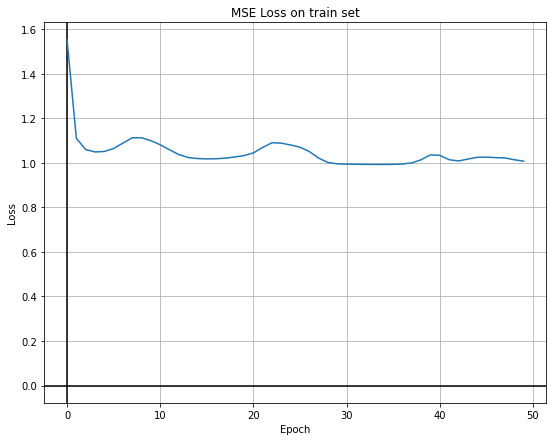

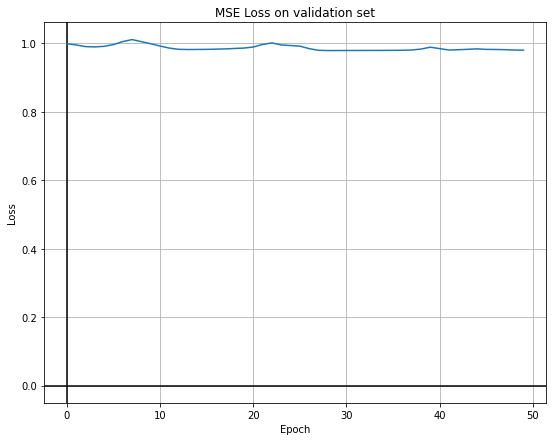

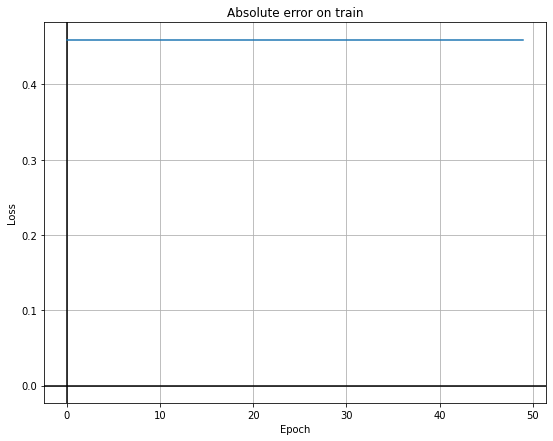

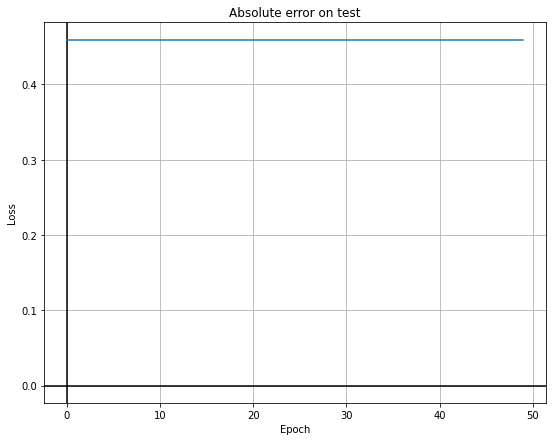

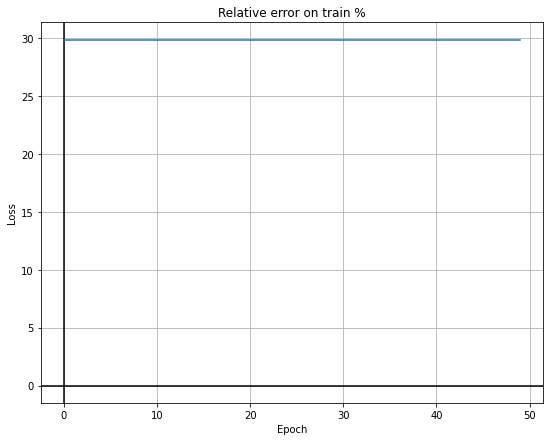

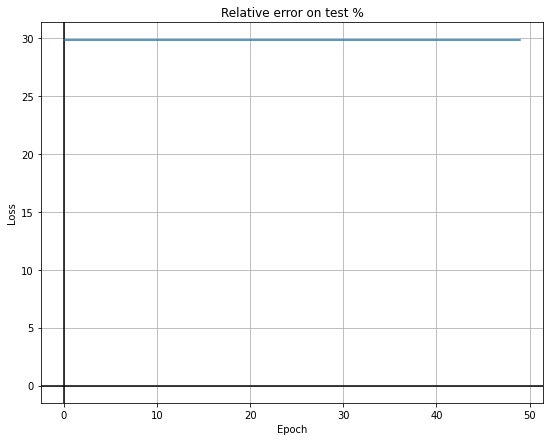

In [38]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.4596977233886719
Train relative error: 29.84464454650879 %
Valid absolute error: 0.4596977233886719
Valid relative error: 29.84464454650879 %


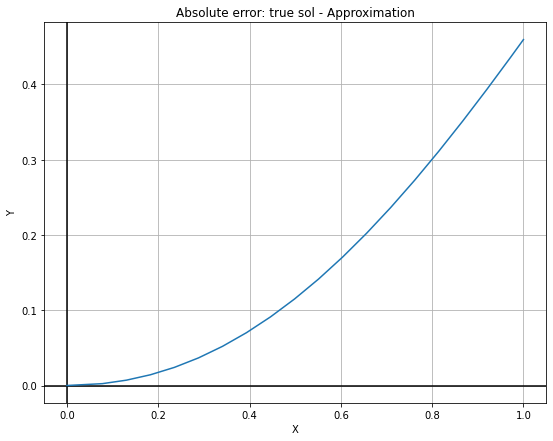

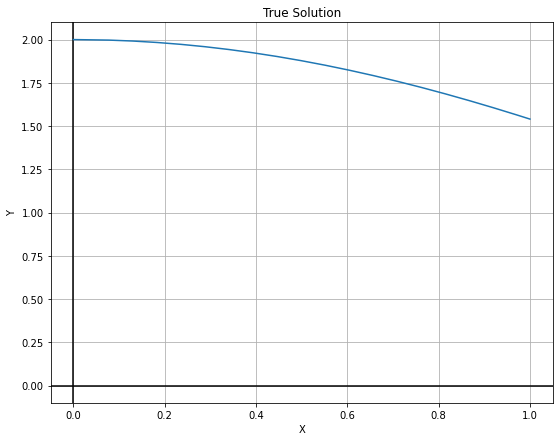

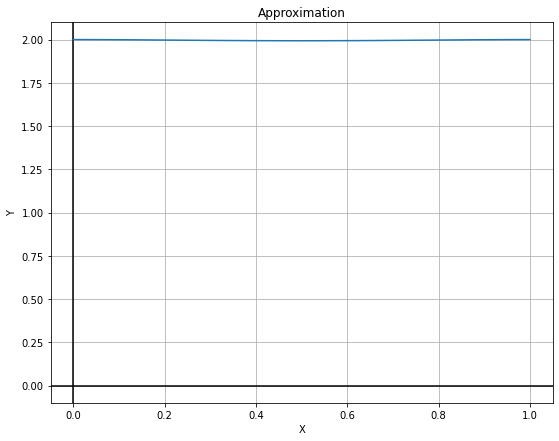

In [39]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ y'' -y = 4exp(x) \\ y(0) = 0 \\ y'(0) = 1 $$

In [52]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    - function
    - 4 * torch.exp(variable)
)


approximation_of_function = (
    lambda x, nn_model_value: 
    x + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return 2 * x * torch.exp(x) - torch.sinh(x)

In [53]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 156.67it/s]

train Loss: 15.3236



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 401.08it/s]


val Loss: 15.6230
Epoch 1/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 174.38it/s]

train Loss: 17.3522



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 426.67it/s]

val Loss: 5.5927
Epoch 2/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 161.72it/s]


train Loss: 3.1162


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 426.66it/s]

val Loss: 2.5395
Epoch 3/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 164.37it/s]

train Loss: 3.4553



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 417.79it/s]

val Loss: 2.6004
Epoch 4/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.26it/s]


train Loss: 3.0612


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.32it/s]

val Loss: 1.2331
Epoch 5/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.92it/s]

train Loss: 1.1220



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.82it/s]

val Loss: 1.5115
Epoch 6/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 182.30it/s]

train Loss: 2.0138



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 393.18it/s]

val Loss: 0.7722
Epoch 7/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 150.78it/s]

train Loss: 0.6584



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 417.79it/s]

val Loss: 0.8901
Epoch 8/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.15it/s]

train Loss: 0.8009



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 385.64it/s]

val Loss: 0.2448


Epoch 9/49:


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 145.32it/s]

train Loss: 0.2335



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 401.07it/s]

val Loss: 1.1945
Epoch 10/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 155.45it/s]

train Loss: 0.5448

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.61it/s]

val Loss: 0.7056
Epoch 11/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.20it/s]

train Loss: 0.4821



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.38it/s]

val Loss: 5.4206
Epoch 12/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 165.75it/s]

train Loss: 1.7555



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 477.46it/s]

val Loss: 6.9611
Epoch 13/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 183.98it/s]

train Loss: 3.5709



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 455.78it/s]

val Loss: 9.8704
Epoch 14/49:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 179.05it/s]

train Loss: 4.9443



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 466.35it/s]

val Loss: 8.4238
Epoch 15/49:



 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:00<00:00, 0<?, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10011 characters

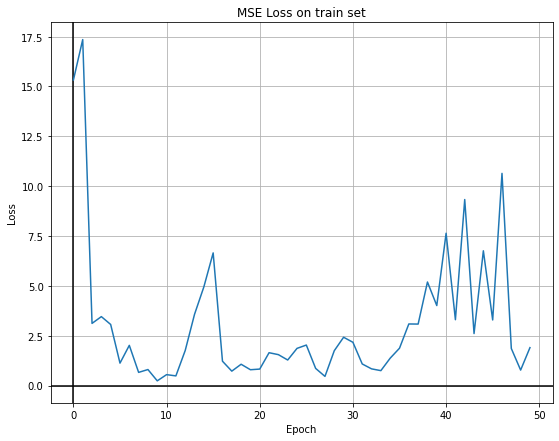

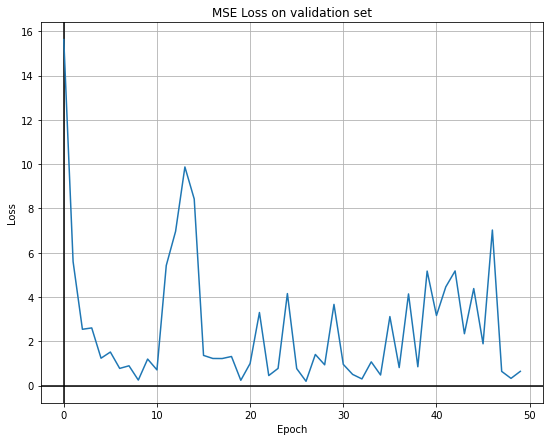

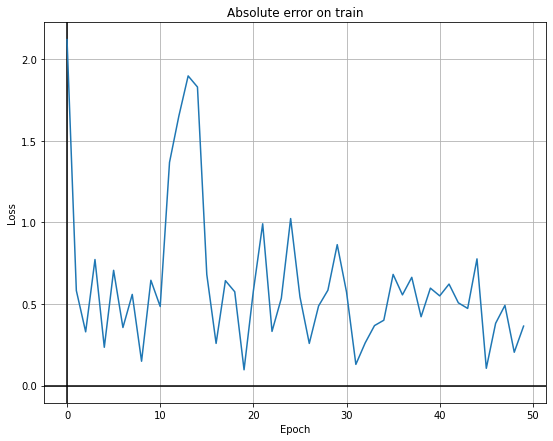

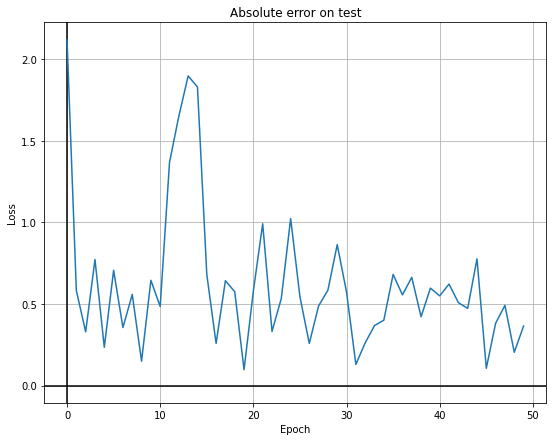

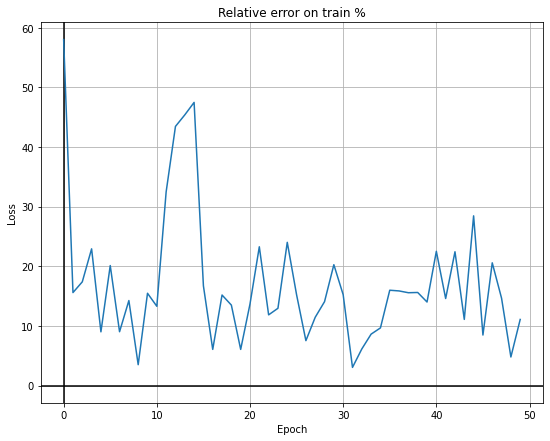

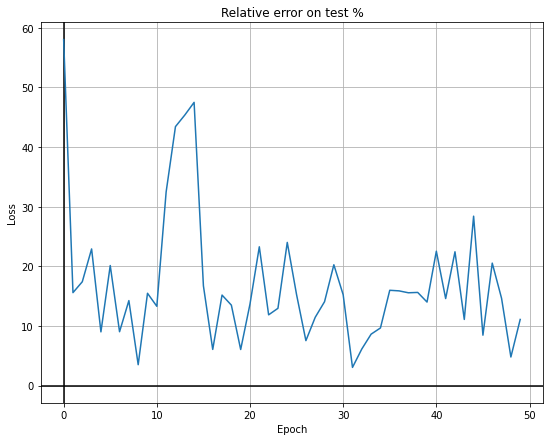

In [54]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.36383056640625
Train relative error: 11.072678565979004 %
Valid absolute error: 0.36383056640625
Valid relative error: 11.079582214355469 %


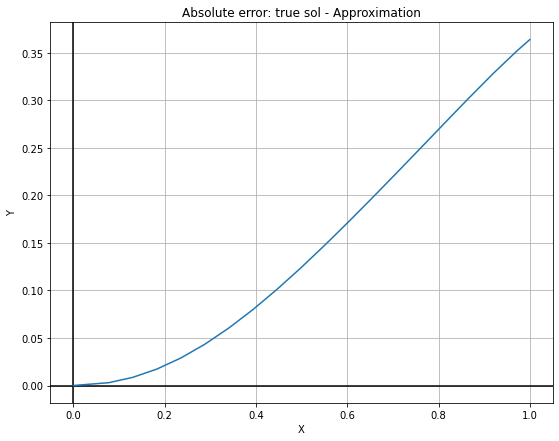

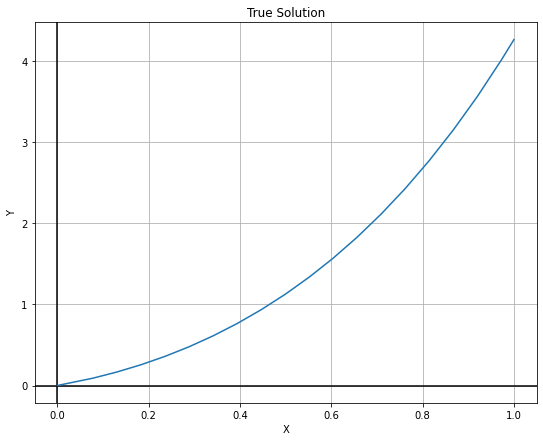

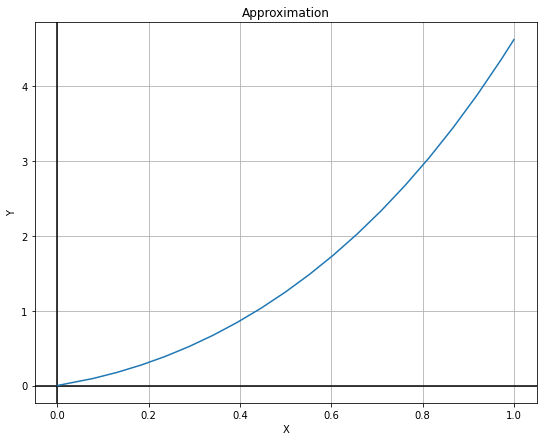

In [55]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)